In [71]:
# import libraries
import pandas as pd
import re
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# load the data
data = pd.read_json('data/li_jobs.json')

In [72]:
# print the first few rows of the data
data.head()

,Title,Description,Primary Description,Detail URL,Location,Skill,Insight,Job State,Poster Id,Company Name,...,Headquarters,Company Founded,Specialties,Hiring Manager Title,Hiring Manager Subtitle,Hiring Manager Title Insight,Hiring Manager Profile,Hiring Manager Image,Created At,Scraped At
0,Mitarbeiter Organisationsmanagement & Prozesso...,Standort: Lohr a.MainBeschäftigungsverhältnis:...,Raiffeisen Immobilien-Dienstleistungs GmbH · L...,https://www.linkedin.com/jobs/view/4169550707,"Lohr, Bavaria, Germany","Skills: Spanish, Artificial Intelligence (AI),...",,LISTED,1479512611,,...,,,,,,,,,2025-02-28T14:24:34.000Z,2025-03-04T20:51:54.642Z
1,Senior Operations & Automation Manager – Label...,\n\nYour mission\n\n\n\nAbout Label OS\n\nLabe...,"iGroove · Berlin, Berlin, Germany (On-site)",https://www.linkedin.com/jobs/view/4144186025,"Berlin, Berlin, Germany","Skills: Soft Skills, Data Analytics, +8 more",,LISTED,222132374,iGroove,...,Pfäffikon,2013,"Digital Music Distribution,Label Services,Arti...",Patrick Lawritsch,COO iGroove // Entrepreneur | Trusted Expert \...,3rd,https://www.linkedin.com/in/plawritsch,https://media.licdn.com/dms/image/v2/C4D03AQGV...,2025-02-07T18:59:15.000Z,2025-03-04T20:52:05.978Z
2,Middelbaar Veiligheidskundige,Ben jij dé specialist in arbeidsveiligheid en ...,"Groothuis Bouw Emmeloord · Emmeloord, Flevolan...",https://www.linkedin.com/jobs/view/4118527660,"Emmeloord, Flevoland, Netherlands",,,LISTED,653913933,Groothuis Bouw Emmeloord,...,Emmeloord,,"Het bouwen van vrijstaande woningen,Traditione...",,,,,,2025-01-07T12:08:16.000Z,2025-03-04T20:52:16.825Z
3,Security consultant - SIEM,Hľadáme odborníka na technológiu SIEM a oblasť...,"exe, a.s. · Bratislava Metropolitan Area (Hybrid)",https://www.linkedin.com/jobs/view/4153637949,Bratislava Metropolitan Area,"Skills: Information Security, Cybersecurity, +...",,LISTED,449502629,"exe, a.s.",...,Bratislava,1990,"Projecting Enterprise Information Systems,Soft...",,,,,,2025-02-18T06:43:37.000Z,2025-03-04T20:52:28.790Z
4,Information Technology Graduate,"CityLearning, a leading provider of compliance...","CityLearning · Dublin, County Dublin, Ireland ...",https://www.linkedin.com/jobs/view/4170246916,"Dublin, County Dublin, Ireland",8 of 10 skills match your profile - you may be...,,LISTED,72468613,CityLearning,...,Dublin 2,1998,"GDPR,Data Protection,Combat Money Laundering,I...",,,,,,2025-03-01T12:42:16.000Z,2025-03-04T20:52:39.856Z


In [44]:
data.columns

Index(['Title', 'Description', 'Primary Description', 'Detail URL', 'Location',
       'Skill', 'Insight', 'Job State', 'Poster Id', 'Company Name',
       'Company Description', 'Company Website', 'Company Logo',
       'Company Apply Url', 'Industry', 'Employee Count', 'Headquarters',
       'Company Founded', 'Specialties', 'Hiring Manager Title',
       'Hiring Manager Subtitle', 'Hiring Manager Title Insight',
       'Hiring Manager Profile', 'Hiring Manager Image', 'Created At',
       'Scraped At'],
      dtype='object')

In [45]:
# convert data to a DataFrame
df = pd.DataFrame(data)

# Drop hiring manager-related columns, scrape info
columns_to_drop = [
    "Headquarters", "Company Apply Url", "Company Founded", "Company Logo",
    "Hiring Manager Title", "Hiring Manager Subtitle", "Hiring Manager Title Insight", 
    "Hiring Manager Profile", "Hiring Manager Image", "Created At",
    "Scraped At"
]
df.drop(columns=columns_to_drop, errors="ignore", inplace=True)


df.columns

Index(['Title', 'Description', 'Primary Description', 'Detail URL', 'Location',
       'Skill', 'Insight', 'Job State', 'Poster Id', 'Company Name',
       'Company Description', 'Company Website', 'Industry', 'Employee Count',
       'Specialties'],
      dtype='object')

In [62]:
# print the first few rows of the DataFrame
df.head()

,Title,Description,Primary Description,Detail URL,Location,Skill,Insight,Job State,Poster Id,Company Name,Company Description,Company Website,Industry,Employee Count,Specialties,Cleaned_Title,Cleaned_Description
0,Mitarbeiter Organisationsmanagement & Prozesso...,Standort: Lohr a.MainBeschäftigungsverhältnis:...,Raiffeisen Immobilien-Dienstleistungs GmbH · L...,https://www.linkedin.com/jobs/view/4169550707,"Lohr, Bavaria, Germany","Spanish, Artificial Intelligence (AI), +8 more",,LISTED,1479512611,,,,,,,mitarbeiter organisationsmanagement prozessopt...,standort lohr amainbeschäftigungsverhältnis te...
1,Senior Operations & Automation Manager – Label...,\n\nYour mission\n\n\n\nAbout Label OS\n\nLabe...,"iGroove · Berlin, Berlin, Germany (On-site)",https://www.linkedin.com/jobs/view/4144186025,"Berlin, Berlin, Germany","Soft Skills, Data Analytics, +8 more",,LISTED,222132374,iGroove,Your music business has a home. Find it all in...,http://www.igroovemusic.com,Music,33,"Digital Music Distribution,Label Services,Arti...",senior operations automation manager label igr...,mission label label powered igroove transforma...
2,Middelbaar Veiligheidskundige,Ben jij dé specialist in arbeidsveiligheid en ...,"Groothuis Bouw Emmeloord · Emmeloord, Flevolan...",https://www.linkedin.com/jobs/view/4118527660,"Emmeloord, Flevoland, Netherlands",,,LISTED,653913933,Groothuis Bouw Emmeloord,Wij zijn Groothuisbouw. Het bouwbedrijf dat ho...,http://www.groothuisbouw.nl,Construction,139,"Het bouwen van vrijstaande woningen,Traditione...",middelbaar veiligheidskundige,jij dé specialist arbeidsveiligheid jij bijdra...
3,Security consultant - SIEM,Hľadáme odborníka na technológiu SIEM a oblasť...,"exe, a.s. · Bratislava Metropolitan Area (Hybrid)",https://www.linkedin.com/jobs/view/4153637949,Bratislava Metropolitan Area,"Information Security, Cybersecurity, +8 more",,LISTED,449502629,"exe, a.s.","Since 1990, exe, a.s. offers complex services ...",http://www.exe.sk,Information Technology & Services,120,"Projecting Enterprise Information Systems,Soft...",security consultant siem,hľadáme odborníka technológiu siem oblasť secu...
4,Information Technology Graduate,"CityLearning, a leading provider of compliance...","CityLearning · Dublin, County Dublin, Ireland ...",https://www.linkedin.com/jobs/view/4170246916,"Dublin, County Dublin, Ireland",,,LISTED,72468613,CityLearning,"At CityLearning, we specialise in simplifying ...",http://www.citylearning.com,E-learning,20,"GDPR,Data Protection,Combat Money Laundering,I...",information technology graduate,citylearning leading provider compliance elear...


In [47]:
# Preprocess the Skill column
def clean_skills(skill_str):
    if isinstance(skill_str, str):
        # Remove "Skills: " if it appears at the beginning
        skill_str = re.sub(r"^Skills:\s*", "", skill_str).strip()
    
        # Remove "X of Y skills match your profile - you may be ..." pattern
        skill_str = re.sub(r"\d+\s+of\s+\d+\s+skills match your profile - you may be.*", "", skill_str, flags=re.IGNORECASE).strip()
        return skill_str
    return ""

df["Skill"] = df["Skill"].apply(clean_skills)

In [63]:
df.head()

,Title,Description,Primary Description,Detail URL,Location,Skill,Insight,Job State,Poster Id,Company Name,Company Description,Company Website,Industry,Employee Count,Specialties,Cleaned_Title,Cleaned_Description
0,Mitarbeiter Organisationsmanagement & Prozesso...,Standort: Lohr a.MainBeschäftigungsverhältnis:...,Raiffeisen Immobilien-Dienstleistungs GmbH · L...,https://www.linkedin.com/jobs/view/4169550707,"Lohr, Bavaria, Germany","Spanish, Artificial Intelligence (AI), +8 more",,LISTED,1479512611,,,,,,,mitarbeiter organisationsmanagement prozessopt...,standort lohr amainbeschäftigungsverhältnis te...
1,Senior Operations & Automation Manager – Label...,\n\nYour mission\n\n\n\nAbout Label OS\n\nLabe...,"iGroove · Berlin, Berlin, Germany (On-site)",https://www.linkedin.com/jobs/view/4144186025,"Berlin, Berlin, Germany","Soft Skills, Data Analytics, +8 more",,LISTED,222132374,iGroove,Your music business has a home. Find it all in...,http://www.igroovemusic.com,Music,33,"Digital Music Distribution,Label Services,Arti...",senior operations automation manager label igr...,mission label label powered igroove transforma...
2,Middelbaar Veiligheidskundige,Ben jij dé specialist in arbeidsveiligheid en ...,"Groothuis Bouw Emmeloord · Emmeloord, Flevolan...",https://www.linkedin.com/jobs/view/4118527660,"Emmeloord, Flevoland, Netherlands",,,LISTED,653913933,Groothuis Bouw Emmeloord,Wij zijn Groothuisbouw. Het bouwbedrijf dat ho...,http://www.groothuisbouw.nl,Construction,139,"Het bouwen van vrijstaande woningen,Traditione...",middelbaar veiligheidskundige,jij dé specialist arbeidsveiligheid jij bijdra...
3,Security consultant - SIEM,Hľadáme odborníka na technológiu SIEM a oblasť...,"exe, a.s. · Bratislava Metropolitan Area (Hybrid)",https://www.linkedin.com/jobs/view/4153637949,Bratislava Metropolitan Area,"Information Security, Cybersecurity, +8 more",,LISTED,449502629,"exe, a.s.","Since 1990, exe, a.s. offers complex services ...",http://www.exe.sk,Information Technology & Services,120,"Projecting Enterprise Information Systems,Soft...",security consultant siem,hľadáme odborníka technológiu siem oblasť secu...
4,Information Technology Graduate,"CityLearning, a leading provider of compliance...","CityLearning · Dublin, County Dublin, Ireland ...",https://www.linkedin.com/jobs/view/4170246916,"Dublin, County Dublin, Ireland",,,LISTED,72468613,CityLearning,"At CityLearning, we specialise in simplifying ...",http://www.citylearning.com,E-learning,20,"GDPR,Data Protection,Combat Money Laundering,I...",information technology graduate,citylearning leading provider compliance elear...


In [ ]:
# download the stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pauli\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [57]:
# Load stopwords for each detected language
stop_words = set()
languages = ["english", "german", "dutch", "italian", "spanish"]
for lang in languages:
    stop_words.update(set(stopwords.words(lang)))

In [68]:
custom_stopwords = {"mwd", "mfd", "gender"}
stop_words.update(custom_stopwords)

In [58]:
# Function to clean text (for columns to be plotted as wordclouds)
def clean_text(text):
    if isinstance(text, str):
        text = text.lower()  # Convert to lowercase
        text = re.sub(r"\d+", "", text)  # Remove numbers
        text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
        text = " ".join(word for word in text.split() if word not in stop_words)  # Remove stopwords
        return text
    return ""

In [69]:
# Clean "Title" and "Description" columns
df["Cleaned_Title"] = df["Title"].apply(clean_text)
df["Cleaned_Description"] = df["Description"].apply(clean_text)
df["Cleaned_Skills"] = df["Skill"].apply(clean_text)
df.head()

,Title,Description,Primary Description,Detail URL,Location,Skill,Insight,Job State,Poster Id,Company Name,Company Description,Company Website,Industry,Employee Count,Specialties,Cleaned_Title,Cleaned_Description,Cleaned_Skills
0,Mitarbeiter Organisationsmanagement & Prozesso...,Standort: Lohr a.MainBeschäftigungsverhältnis:...,Raiffeisen Immobilien-Dienstleistungs GmbH · L...,https://www.linkedin.com/jobs/view/4169550707,"Lohr, Bavaria, Germany","Spanish, Artificial Intelligence (AI), +8 more",,LISTED,1479512611,,,,,,,mitarbeiter organisationsmanagement prozessopt...,standort lohr amainbeschäftigungsverhältnis te...,spanish artificial intelligence
1,Senior Operations & Automation Manager – Label...,\n\nYour mission\n\n\n\nAbout Label OS\n\nLabe...,"iGroove · Berlin, Berlin, Germany (On-site)",https://www.linkedin.com/jobs/view/4144186025,"Berlin, Berlin, Germany","Soft Skills, Data Analytics, +8 more",,LISTED,222132374,iGroove,Your music business has a home. Find it all in...,http://www.igroovemusic.com,Music,33,"Digital Music Distribution,Label Services,Arti...",senior operations automation manager label igr...,mission label label powered igroove transforma...,soft skills data analytics
2,Middelbaar Veiligheidskundige,Ben jij dé specialist in arbeidsveiligheid en ...,"Groothuis Bouw Emmeloord · Emmeloord, Flevolan...",https://www.linkedin.com/jobs/view/4118527660,"Emmeloord, Flevoland, Netherlands",,,LISTED,653913933,Groothuis Bouw Emmeloord,Wij zijn Groothuisbouw. Het bouwbedrijf dat ho...,http://www.groothuisbouw.nl,Construction,139,"Het bouwen van vrijstaande woningen,Traditione...",middelbaar veiligheidskundige,jij dé specialist arbeidsveiligheid jij bijdra...,
3,Security consultant - SIEM,Hľadáme odborníka na technológiu SIEM a oblasť...,"exe, a.s. · Bratislava Metropolitan Area (Hybrid)",https://www.linkedin.com/jobs/view/4153637949,Bratislava Metropolitan Area,"Information Security, Cybersecurity, +8 more",,LISTED,449502629,"exe, a.s.","Since 1990, exe, a.s. offers complex services ...",http://www.exe.sk,Information Technology & Services,120,"Projecting Enterprise Information Systems,Soft...",security consultant siem,hľadáme odborníka technológiu siem oblasť secu...,information security cybersecurity
4,Information Technology Graduate,"CityLearning, a leading provider of compliance...","CityLearning · Dublin, County Dublin, Ireland ...",https://www.linkedin.com/jobs/view/4170246916,"Dublin, County Dublin, Ireland",,,LISTED,72468613,CityLearning,"At CityLearning, we specialise in simplifying ...",http://www.citylearning.com,E-learning,20,"GDPR,Data Protection,Combat Money Laundering,I...",information technology graduate,citylearning leading provider compliance elear...,


In [60]:
# Function to generate and display a word cloud
def plot_wordcloud(text, title):
    wordcloud = WordCloud(
        width=800, height=400,
        background_color="white",
        colormap="viridis",
        max_words=100
    ).generate(" ".join(text))

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=14)
    plt.show()

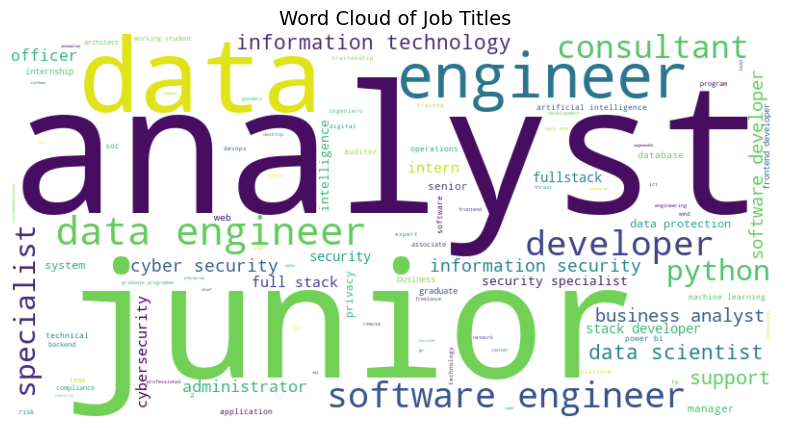

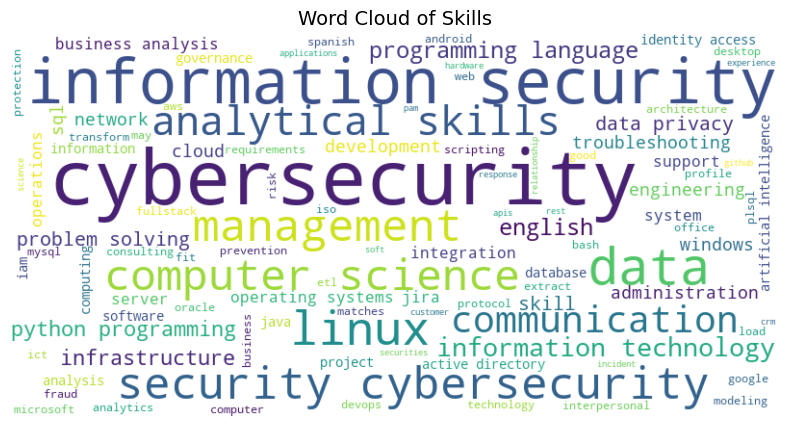

In [ ]:
# Generate word clouds
plot_wordcloud(df["Cleaned_Title"], "Word Cloud of Job Titles")
# plot_wordcloud(df["Cleaned_Description"], "Word Cloud of Job Descriptions")
plot_wordcloud(df["Cleaned_Skills"], "Word Cloud of Skills")